## Assignment 1 - Detection of Circular Trading using Node2Vec
## Fraud Analytics(CS6890)


# Team 
- Rahul Vigneswaran K | CS23MTECH02002
- SarveshKumar Purohit | AI22MTECH14006
- Rithik Agarwal | CS22MTECH11004
- Vinayak Nambiar | AI22MTECH13005
- Roshin Roy | AI22MTECH13006
- Parth Nitesh Thakkar | CS22MTECH14005

#### 1. Importing Required Packages

In [25]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [26]:
nx.__version__

'3.1'

#### 2. Importing Dataset and performing Exploratory Data Analysis (EDA) on dataset

In [27]:
df = pd.read_csv('Iron_dealers_data.csv')
df.rename(columns = {'Seller ID':'seller_id' , "Buyer ID" : 'buyer_id' , "Value" : "value"}, inplace = True)

In [28]:
df.head()

,seller_id,buyer_id,value
0,1309,1011,1225513.0
1,1309,1011,1179061.0
2,1309,1011,1119561.0
3,1309,1011,1200934.0
4,1309,1011,1658957.0


In [29]:
df.describe()

,seller_id,buyer_id,value
count,130535.000000,130535.000000,1.305350e+05
mean,1309.358287,1182.851258,6.930965e+05
std,294.435026,169.809657,5.696676e+05
min,1001.000000,1001.000000,1.000600e+04
25%,1078.000000,1060.000000,2.361085e+05
50%,1214.000000,1112.000000,5.571960e+05
75%,1488.000000,1276.000000,1.074405e+06
max,2190.000000,1887.000000,2.124000e+07


In [30]:
print("Total data ")
print("-"*50)
print("Total No of unique seller_id :", len(np.unique(df.seller_id)))
print("Total No of unique buyer_id :", len(np.unique(df.buyer_id)))
print("Total no of transaction between buyer and seller (This will be the Number of edges in graph):",df.shape[0])
print("Total No of unique seller_id, buyer_id pair (This will be the Number of nodes in graph):", len(np.unique(df[['buyer_id', 'seller_id']])))

Total data 
--------------------------------------------------
Total No of unique seller_id : 703
Total No of unique buyer_id : 371
Total no of transaction between buyer and seller (This will be the Number of edges in graph): 130535
Total No of unique seller_id, buyer_id pair (This will be the Number of nodes in graph): 799


In [31]:
df.shape

(130535, 3)

#### 3.Creating Directed weighted multiedge graph from dataset


* for each row seller_id , buyer_id will work as nodes and value will work as weight of edge between them. 

E.g: for example for below dataset

Seller Id | Buyer Id | Value
--- | :---: |:---:
1309 | 1011 | 1225513.0
1309 | 1011	| 1179061.0
1309 | 1012 | 1178545.0

Directed multiedge graph will look like this

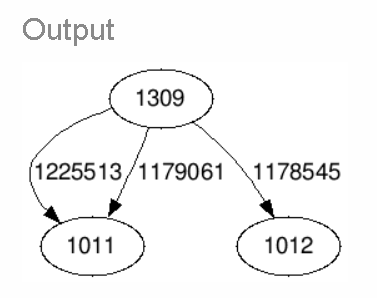

In [32]:
# Create an empty directed multigraph
G = nx.MultiDiGraph()

for i in range(df.shape[0]):
  G.add_weighted_edges_from([(df['seller_id'][i], df['buyer_id'][i], df['value'][i])])

print("Number of nodes:", len(G.nodes()))
print("Number of edges:", len(G.edges()))
print("This numbers are matching with our calulation which have done in EDA")

Number of nodes: 799
Number of edges: 130535
This numbers are matching with our calulation which have done in EDA


In [33]:
#converting multidirected weighted graph to dict form
graph_dict = nx.to_dict_of_dicts(G)

print(graph_dict[1065])

{1067: {0: {'weight': 514097.0}, 1: {'weight': 347617.38}, 2: {'weight': 545156.0}, 3: {'weight': 509780.0}, 4: {'weight': 622241.74}, 5: {'weight': 496825.0}, 6: {'weight': 503894.0}}, 1114: {0: {'weight': 712956.0}, 1: {'weight': 572253.0}, 2: {'weight': 597794.0}}}


In [34]:
G.get_edge_data(1065,1067)

{0: {'weight': 514097.0},
 1: {'weight': 347617.38},
 2: {'weight': 545156.0},
 3: {'weight': 509780.0},
 4: {'weight': 622241.74},
 5: {'weight': 496825.0},
 6: {'weight': 503894.0}}

In [35]:
print(G)

MultiDiGraph with 799 nodes and 130535 edges


#### 4.Creating Directed Simple Weighted graph from Directed Multi Weighted Graph

In [36]:
D = nx.DiGraph()

In [37]:
prev_u=0
prev_v=0
for u,v,data in G.edges(data=True):
  #node is already exist in D
  if(u==prev_u and v==prev_v):
    D[u][v]['weight'] = D[u][v]['weight'] + data['weight']
  else:
    D.add_weighted_edges_from([(u,v,data['weight'])])
  prev_u=u
  prev_v=v

In [38]:
print("Number of nodes:", len(D.nodes()))
print("Number of edges:", len(D.edges()))

Number of nodes: 799
Number of edges: 5358


In [39]:
D.get_edge_data(1309,1011)

{'weight': 238881091.0}

In [40]:
D.has_edge(1309, 1011)

True

#### 5. Finding all the clockwise and anticlockwise cycle

In [41]:
#Finding all the 3 cycles and 2 cycles in D
cycles=list(nx.simple_cycles(D, length_bound=3))

In [42]:
cycles

[[1385, 1325],
 [1298, 1148],
 [1025, 1248],
 [1026, 1093, 1105],
 [1026, 1181, 1105],
 [1026, 1181],
 [1026, 1181, 1037],
 [1026, 1184, 1049],
 [1026, 1184, 1037],
 [1026, 1433, 1049],
 [1026, 1433],
 [1026, 1433, 1105],
 [1026, 1340, 1181],
 [1026, 1340, 1433],
 [1026, 1340, 1037],
 [1027, 1136],
 [1027, 1136, 1769],
 [1027, 1072],
 [1027, 1072, 1523],
 [1033, 1326, 1016],
 [1033, 1326, 1037],
 [1033, 1771],
 [1034, 1074, 1003],
 [1034, 1074, 1079],
 [1034, 1074, 1039],
 [1034, 1074, 1068],
 [1034, 1074, 1138],
 [1034, 1074, 1189],
 [1034, 1074, 1099],
 [1034, 1074],
 [1034, 1074, 1327],
 [1034, 1074, 1199],
 [1034, 1074, 1676],
 [1034, 1003],
 [1034, 1004, 1003],
 [1034, 1004, 1105],
 [1034, 1004, 1189],
 [1034, 1004, 1282],
 [1034, 1004, 1523],
 [1034, 1004, 1199],
 [1034, 1004, 1676],
 [1034, 1079, 1023],
 [1034, 1079, 1189],
 [1034, 1079, 1099],
 [1034, 1079, 1278],
 [1034, 1079, 1247],
 [1034, 1079, 1068],
 [1034, 1079, 1105],
 [1034, 1079, 1327],
 [1034, 1079, 1282],
 [1034, 10

In [47]:
print("Total Number of Three and Two cycles are:",len(cycles))

Total Number of Three and Two cycles are: 1907


#### 6. For each cycle storing the Minimum value

In [48]:
#for each cycle storing min weight value
min_weight=[]

for item in cycles:
  #3 length
  if(len(item)==3):
    a = D.get_edge_data(item[0],item[1])['weight']
    b = D.get_edge_data(item[1],item[2])['weight']
    c = D.get_edge_data(item[2],item[0])['weight']
    min_weight.append(min(a,b,c))
  #2 length
  else:
    a = D.get_edge_data(item[0],item[1])['weight']
    b = D.get_edge_data(item[1],item[0])['weight']
    min_weight.append(min(a,b))

#### 7. For each edge calculating the weight value which will be used to create undirected simple graph

In [55]:
edge_weight={}

for item,mini in zip(cycles,min_weight):

  #3 length cycle [0,1,2]
  if(len(item)==3):
    #for (0,1)
    if (item[0],item[1]) in edge_weight:
      edge_weight[(item[0],item[1])].append(mini)
    else:
      edge_weight[(item[0],item[1])]=[mini]
    
    #for (1,2)
    if (item[1],item[2]) in edge_weight:
      edge_weight[(item[1],item[2])].append(mini)
    else:
      edge_weight[(item[1],item[2])]=[mini]
    
    #for (2,0)
    if (item[2],item[0]) in edge_weight:
      edge_weight[(item[2],item[0])].append(mini)
    else:
      edge_weight[(item[2],item[0])]=[mini]

  #2 length cycle [0,1]
  if(len(item)==2):
    #for (0,1)
    if (item[0],item[1]) in edge_weight:
      edge_weight[(item[0],item[1])].append(mini)
    else:
      edge_weight[(item[0],item[1])]=[mini]
    
    #for (1,0)
    if (item[1],item[0]) in edge_weight:
      edge_weight[(item[1],item[0])].append(mini)
    else:
      edge_weight[(item[1],item[0])]=[mini]

      

In [56]:
edge_weight[(1026, 1181)]

[128660.0, 60985.0, 994350.0]

#### 5. Creating Undirected Simple Weighted Graph from Directed Simple Weighted Graph

In [57]:
undirected=list(D.nodes)
undirected_G = nx.complete_graph(undirected, nx.Graph())
print(undirected_G)

Graph with 799 nodes and 318801 edges


In [58]:
undirected_G.is_directed()

False

In [59]:
import sys
sys.float_info
sys.float_info.min

2.2250738585072014e-308

In [60]:
for e in undirected_G.edges():
    undirected_G[e[0]][e[1]]['weight'] = sys.float_info.min

In [61]:
print(undirected_G)
undirected_G.is_directed()

Graph with 799 nodes and 318801 edges


False

In [62]:
for edge, w in edge_weight.items():
    undirected_G[edge[0]][edge[1]]['weight'] = max(w) 

In [63]:
undirected_G.get_edge_data(1026, 1181)

{'weight': 60985.0}

In [66]:
for e in undirected_G.edges():
    if(undirected_G[e[0]][e[1]]['weight']==sys.float_info.min):
        undirected_G.remove_edge(e[0], e[1])

#### 6. Node2VEC

In [67]:
pip install node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [82]:
from node2vec import Node2Vec
node2vec = Node2Vec(undirected_G, dimensions=64, walk_length=30, num_walks=100, workers=4)

Computing transition probabilities:   0%|          | 0/799 [00:00<?, ?it/s]

In [83]:
model = node2vec.fit(window=29, min_count=1,workers=4)

In [84]:
embeddings=model.wv.vectors

In [85]:
model.wv.vectors.shape

(799, 64)

#### 7. Elbo Method to find Eps and minpoint parameter value for DBSCAN

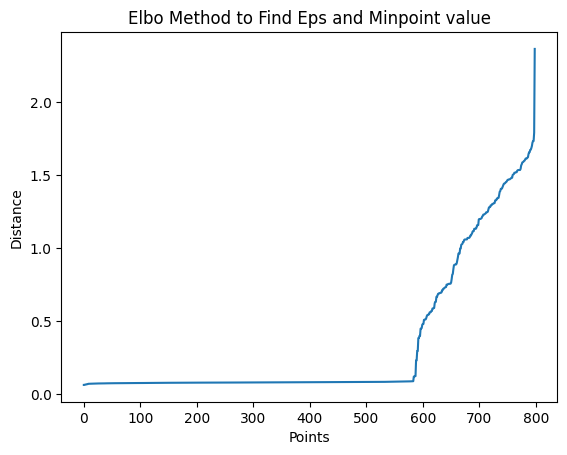

In [89]:
from sklearn.neighbors import NearestNeighbors

k = NearestNeighbors(n_neighbors=2)
neighbour = k.fit(embeddings)
X, _ = neighbour.kneighbors(embeddings)
X = np.sort(X, axis=0)
X = X[:, 1]
plt.plot(X)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Elbo Method to Find Eps and Minpoint value")
plt.show()

In [92]:
print("Elbo point is :", 0.125)
print("This will be the Eps value for our DBSCAN Algorithm")

Elbo point is : 0.125
This will be the Eps value for our DBSCAN Algorithm


#### 8. DBSCAN clustering on Node2Vec embeddings

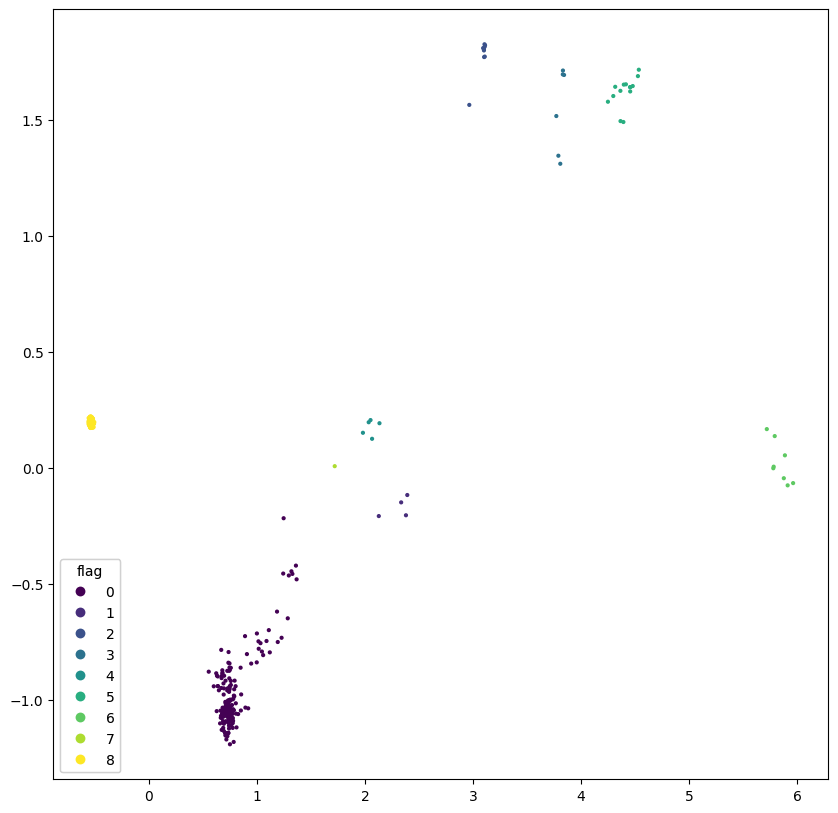

In [163]:
node_ids = list(model.wv.index_to_key)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.25,min_samples=1).fit(embeddings)
labels = dbscan.fit_predict(embeddings)

# Plot the clusters
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(embeddings[:, 0], embeddings[:, 1], c=dbscan.labels_, cmap='viridis',s=4)
legend = ax.legend(*scatter.legend_elements(), loc="lower left", title='flag')
ax.add_artist(legend)
plt.show()

In [123]:
print("Total Number of clusters are:",len(Counter(dbscan.labels_)))

Total Number of clusters are: 9


In [124]:
from collections import Counter
for i in range(len(Counter(dbscan.labels_))):
  print("In cluster",i,"number of elemets are",Counter(dbscan.labels_)[i])

In cluster 0 number of elemets are 168
In cluster 1 number of elemets are 4
In cluster 2 number of elemets are 9
In cluster 3 number of elemets are 6
In cluster 4 number of elemets are 5
In cluster 5 number of elemets are 14
In cluster 6 number of elemets are 8
In cluster 7 number of elemets are 1
In cluster 8 number of elemets are 584


#### 9. Verifying Cluster and ploting the cluster in Graph form

In [125]:
G_nodes=list(G.nodes)

In [126]:
len(G_nodes)

799

In [145]:
Cluster = []
for cluster in set(dbscan.labels_):
    i = np.array(G.nodes)[dbscan.labels_ == cluster]
    Cluster.append(sorted(i))

In [153]:
for i in range(len(Cluster)):
  print("Seller ID and Dealer ID which are in cluster",i,Cluster[i])

Seller ID and Dealer ID which are in cluster 0 [1004, 1005, 1007, 1009, 1011, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1031, 1032, 1034, 1035, 1039, 1040, 1042, 1045, 1046, 1048, 1049, 1054, 1056, 1057, 1058, 1061, 1065, 1068, 1073, 1074, 1075, 1076, 1077, 1078, 1080, 1081, 1084, 1089, 1090, 1098, 1099, 1103, 1108, 1114, 1120, 1126, 1128, 1134, 1138, 1140, 1142, 1144, 1145, 1147, 1149, 1151, 1159, 1162, 1163, 1168, 1179, 1181, 1189, 1191, 1199, 1202, 1205, 1209, 1210, 1215, 1220, 1223, 1224, 1228, 1236, 1245, 1246, 1256, 1259, 1261, 1276, 1283, 1287, 1302, 1309, 1310, 1326, 1335, 1339, 1344, 1353, 1356, 1389, 1390, 1391, 1393, 1397, 1405, 1406, 1431, 1447, 1469, 1470, 1471, 1473, 1475, 1480, 1484, 1488, 1503, 1517, 1524, 1528, 1529, 1541, 1545, 1553, 1562, 1568, 1575, 1581, 1582, 1591, 1595, 1597, 1598, 1617, 1633, 1645, 1658, 1666, 1668, 1678, 1679, 1696, 1701, 1723, 1729, 1748, 1754, 1757, 1764, 1766, 1769, 1780, 1801, 1813, 1818, 1832, 1835, 1837, 1859, 1862, 1891, 1914, 1917, 1959

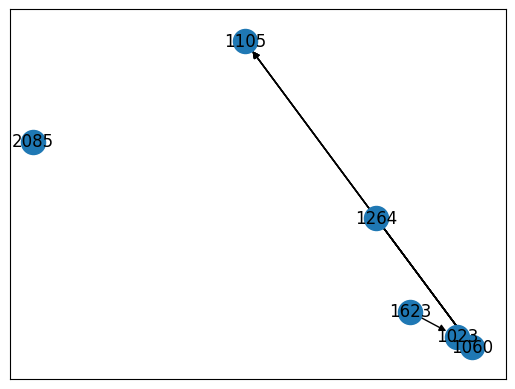

In [155]:
nx.draw_networkx(G.subgraph(Cluster[3]))

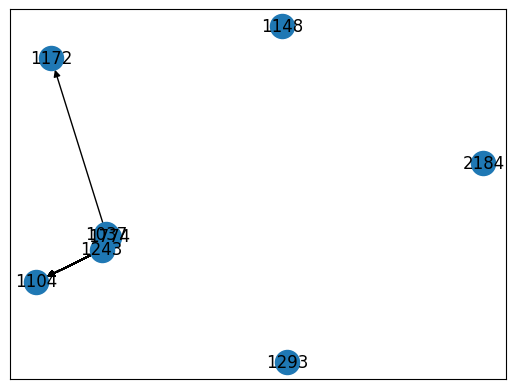

In [158]:
nx.draw_networkx(G.subgraph(Cluster[6]))